In [1]:
import pickle

import networkx as nx
from networkx.drawing.nx_pydot import graphviz_layout

import numpy as np; np.set_printoptions(suppress=True)
import pandas as pd
import matplotlib.pyplot as plt

from plot_module import plot_ODE, plot_gillespie, plot_simulator_graph, plot_neuron_graph
from sim_param_from_network import names_from_network, gillespie_param_from_network, dataframes_from_network, ODE_from_network, start_state_from_nodes
from network_generate import net_gen_line_chain, net_gen_line_ring, net_gen_line_powlawtree, net_gen_hub_ring
from neuron_graph_transform import neuron_graph_transform, add_bioparam_attributes
from simulate import simulate_ode, simulate_gillespie

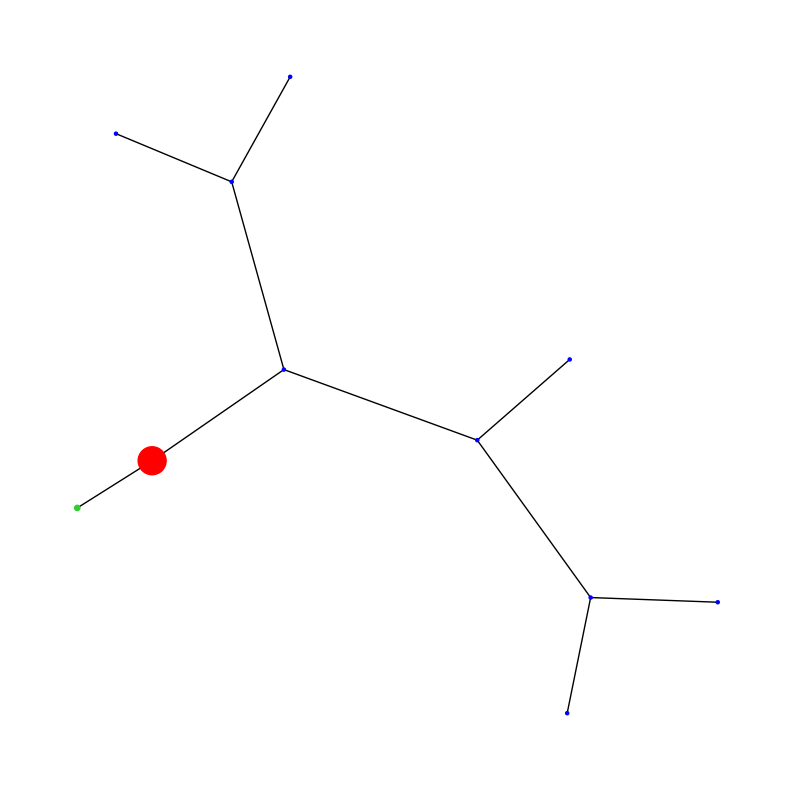

In [13]:
neuron_filename = 'm_hippocampus_NMO_97827.pkl'
with open(f'neuron_shape_data/{neuron_filename}', 'rb') as f:
    G = pickle.load(f)    

plot_neuron_graph(G)

> The undirected input graph has 11 nodes, and 10 edges, and 2 subgraph(s):
'axon with 9 nodes', 'dendrite with 1 nodes'
> the directed output graph has 14 nodes, and 28 edges


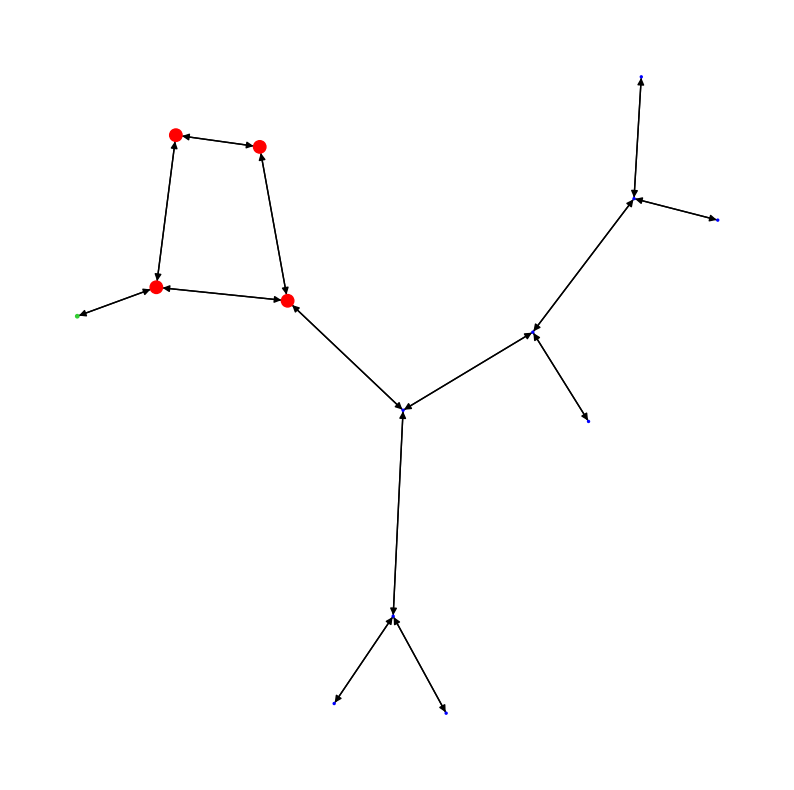

In [16]:
neuron_graph = neuron_graph_transform(G, transform_type='bidirect', n_soma_nodes=4)

plot_neuron_graph(neuron_graph)

In [17]:
TIME_POINTS = np.linspace(0, 100, 1001)

SOMA_CB = 0.5
SOMA_BR = 0.4
SOMA_NSS = 100
SOMA_DIFFUSION = 0.4

DELTA = 0.5
DEATH_RATE = 0.4

AXON_TRNSP_ANT = 8
AXON_TRNSP_RET = 6

REVERSAL_RATE = 0.001

BIO_PARAM = {
    'soma_cb':SOMA_CB, 
    'soma_br':SOMA_BR, 
    'soma_nss':SOMA_NSS,
    'soma_diffusion':SOMA_DIFFUSION,
    
    'delta':DELTA, 
    'death_rate':DEATH_RATE, 
    
    'gamma_ant':AXON_TRNSP_ANT,
    'gamma_ret':AXON_TRNSP_RET,
    
    'reversal_rate':REVERSAL_RATE,
    }

START_POP = [90, 20]

neruon_graph = add_bioparam_attributes(neuron_graph, BIO_PARAM)

#for u, v, data in neuron_graph.edges(data = True): print(f'{u}-{v}: {data}')
#for node, data in neuron_graph.nodes(data = True): print(f'{node}: {data}')

In [18]:
VARS, NODES = names_from_network(neuron_graph)
START_STATE = start_state_from_nodes(NODES, START_POP)
#START_STATE[1] = 1

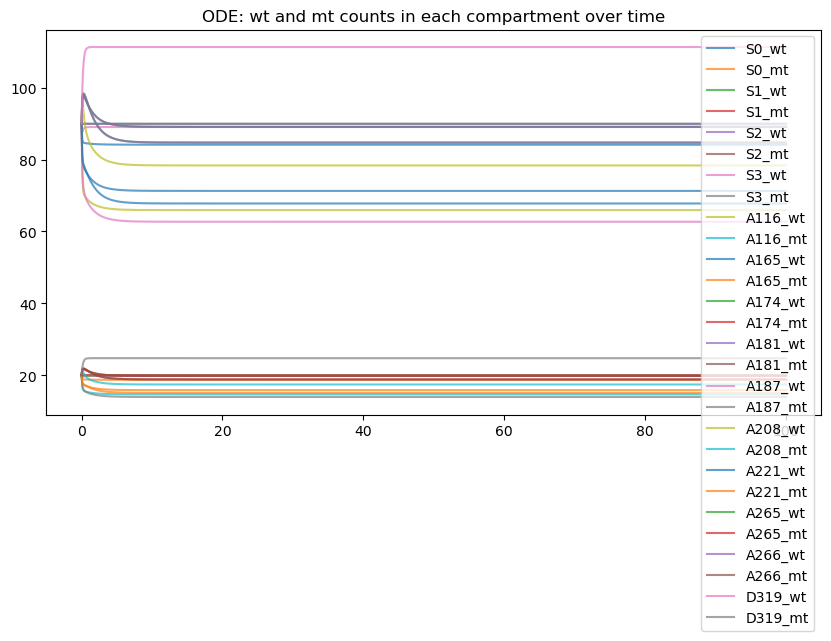

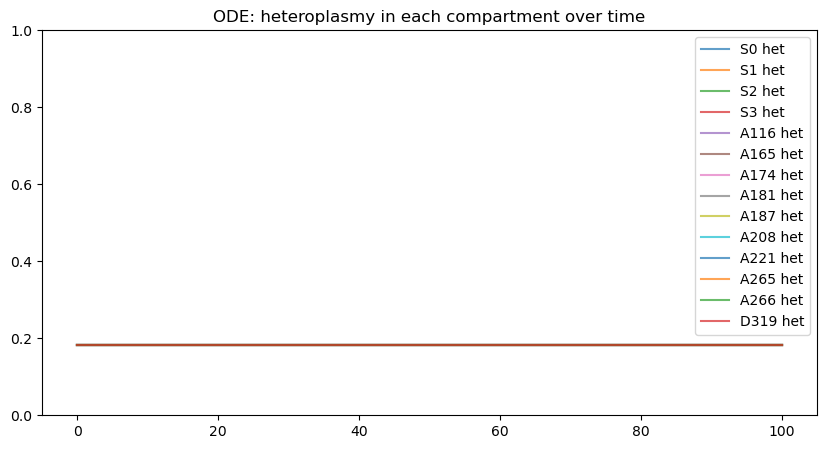

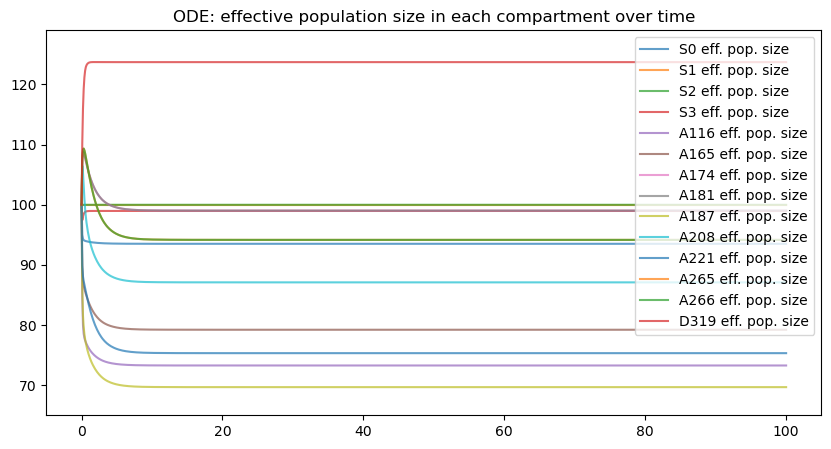

> Final counts of mt and wt in each compartment:
S0_wt	84.1553	
S0_mt	18.7012	
S1_wt	89.9539	
S1_mt	19.9898	
S2_wt	89.9923	
S2_mt	19.9983	
S3_wt	89.0678	
S3_mt	19.7928	
A116_wt	65.9498	
A116_mt	14.6555	
A165_wt	71.297	
A165_mt	15.8438	
A174_wt	89.1213	
A174_mt	19.8047	
A181_wt	89.1213	
A181_mt	19.8047	
A187_wt	62.7084	
A187_mt	13.9352	
A208_wt	78.3855	
A208_mt	17.419	
A221_wt	67.7929	
A221_mt	15.0651	
A265_wt	84.7411	
A265_mt	18.8314	
A266_wt	84.7411	
A266_mt	18.8314	
D319_wt	111.3347	
D319_mt	24.741	

> Final effective population sizes in each compartment:
S0	93.5058	
S1	99.9488	
S2	99.9914	
S3	98.9642	
A116	73.2775	
A165	79.2189	
A174	99.0237	
A181	99.0237	
A187	69.676	
A208	87.095	
A221	75.3254	
A265	94.1568	
A266	94.1568	
D319	123.7052	


In [19]:
ODE_model = ODE_from_network(neuron_graph)
plot_ODE(simulate_ode(ODE_model, TIME_POINTS, START_STATE), TIME_POINTS, DELTA, VARS, NODES)

simulating...


100%|██████████| 100/100 [00:14<00:00,  6.89it/s]


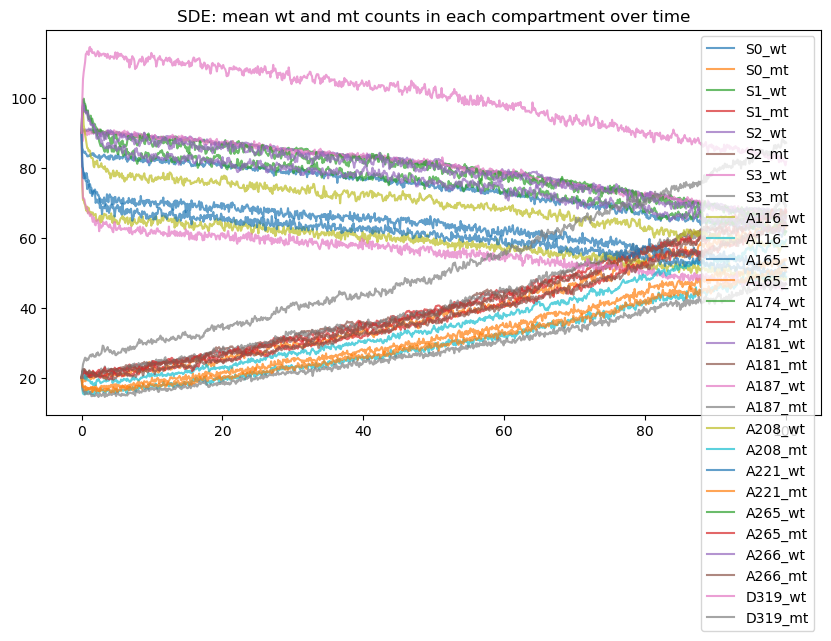

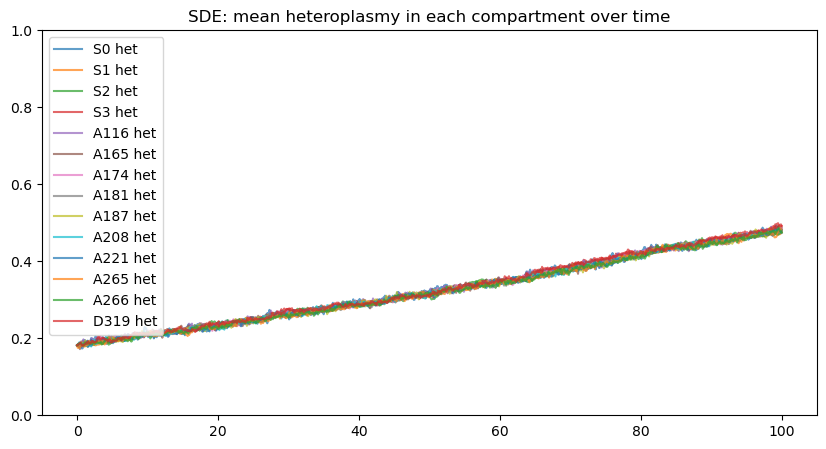

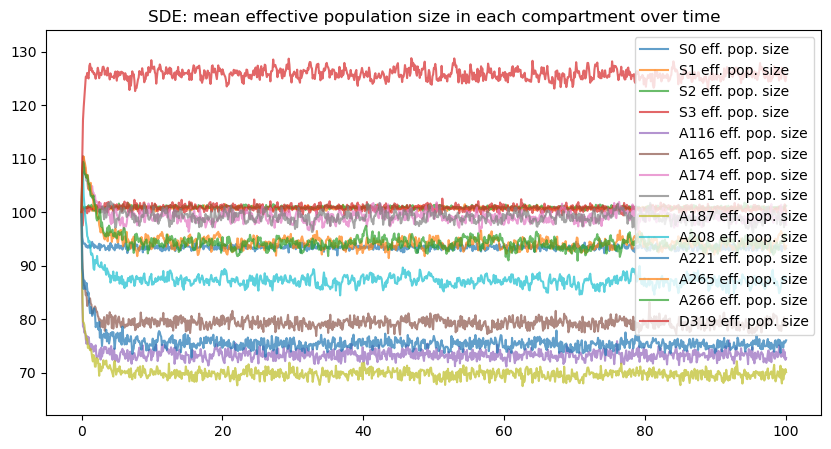

> Final mean counts of mt and wt in each compartment:
S0_wt	61.76	
S0_mt	62.91	
S1_wt	66.39	
S1_mt	67.67	
S2_wt	67.56	
S2_mt	67.22	
S3_wt	65.25	
S3_mt	69.31	
A116_wt	48.3	
A116_mt	48.79	
A165_wt	51.76	
A165_mt	53.78	
A174_wt	64.05	
A174_mt	67.17	
A181_wt	66.24	
A181_mt	66.06	
A187_wt	46.73	
A187_mt	46.66	
A208_wt	57.76	
A208_mt	59.38	
A221_wt	50.23	
A221_mt	51.57	
A265_wt	61.81	
A265_mt	63.78	
A266_wt	63.93	
A266_mt	63.45	
D319_wt	81.78	
D319_mt	87.16	

> Final mean heteroplasmy in each compartment:
S0	0.4802	
S1	0.4763	
S2	0.4739	
S3	0.4914	
A116	0.478	
A165	0.4862	
A174	0.4846	
A181	0.4738	
A187	0.4765	
A208	0.4815	
A221	0.4818	
A265	0.4819	
A266	0.4753	
D319	0.492	

> Final mean effective population sizes in each compartment:
S0	93.215	
S1	100.225	
S2	101.17	
S3	99.905	
A116	72.695	
A165	78.65	
A174	97.635	
A181	99.27	
A187	70.06	
A208	87.45	
A221	76.015	
A265	93.7	
A266	95.655	
D319	125.36	

> Change in mean heteroplasmy: 
start: 0.1818
final: 0.4818
delta: 0.3


In [20]:
GILL_PARAM = gillespie_param_from_network(neuron_graph)
gillespie_results = simulate_gillespie(GILL_PARAM, TIME_POINTS, START_STATE, replicates=100)
plot_gillespie(gillespie_results, TIME_POINTS, DELTA, VARS, NODES)